c:\Users\wjsrh\Desktop\전광민\01.MicroSoft_Bootcamp\9-1. 실습\notebooks
c:\Users\wjsrh\Desktop\전광민\01.MicroSoft_Bootcamp\9-1. 실습
=========iteration0=========
SGD:2.3224051779453063
Momentum:2.3315655749309547
AdaGrad:2.4476069627970416
Adam:2.2208095973409376
=========iteration100=========
SGD:1.7317183401864629
Momentum:0.3064790346794269
AdaGrad:0.16901539301934043
Adam:0.29480556654753554
=========iteration200=========
SGD:0.9715206941722125
Momentum:0.34659033214566415
AdaGrad:0.16019748507174675
Adam:0.25629704365209227
=========iteration300=========
SGD:0.49101419398564344
Momentum:0.2001099871580413
AdaGrad:0.08266941989205909
Adam:0.1267114181893636
=========iteration400=========
SGD:0.42850987929243867
Momentum:0.2126891553784495
AdaGrad:0.047227675205782596
Adam:0.1260832735286825
=========iteration500=========
SGD:0.3727463690128972
Momentum:0.15223120571653856
AdaGrad:0.03267410658388502
Adam:0.10649653925346231
=========iteration600=========
SGD:0.44251071724146845
Momentum:0.2

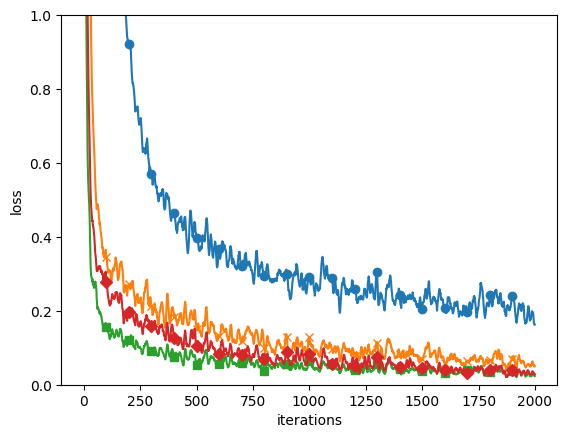

In [3]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


optimizers = {}
optimizers["SGD"] = SGD()
optimizers["Momentum"] = Momentum()
optimizers["AdaGrad"] = AdaGrad()
optimizers["Adam"] = Adam()
# optimizers["RMSprop"] = RMSprop()

networks = {}
train_loss = {}

for key in optimizers:
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100,100,100,100], output_size=10)
    train_loss[key] = []




for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch,t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch,t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("=========" + "iteration" + str(i)+"=========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))



markers = {"SGD": "o", "Momentum": "x","AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker = markers[key], markevery = 100, label = key)
plt.ylim(0,1)   
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()
